# Populations in Medieval Europe

<i>References:</i> 

<li> https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1
<li> https://jingwen-z.github.io/draw-animated-graphs-with-matplotlib/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.signal

## Data importing, cleaning, augmentation and smoothing

In [2]:
df = pd.read_excel("/Users/Hendrik/Documents/Coding/Data Science/Reddit/Medieval Populations in Europe/eu_medieval_pop_growth.xlsx",sheet_name="Data2")

In [3]:
def augment(list_input,interval=20):
    new_list = []
    for i in range(len(list_input)-1):
        sublist = np.linspace(list_input[i],list_input[i+1],interval,endpoint=False)
        new_list.append(sublist)
        flat_list = [item for sublist in new_list for item in sublist]
    return flat_list

In [4]:
df2 = pd.concat([df.apply(augment,axis=0),df.iloc[[-1],:]])

In [5]:
df3 = df2.apply(scipy.signal.savgol_filter, args=(25,5),axis = 0)
df3 = df3.rename(columns={"Year":"X"})
df3 = df3.set_index(df2['Year'])
df3 = df3.drop(["X"],1)
df3 = df3.apply(scipy.signal.savgol_filter, args=(25,5),axis = 0)
df3

,Germany,France,GBR,Italy,Spain and Portugal,Belgium,Netherlands
Year,,,,,,,
1000.0,5.399601,9.000000,1.901198,7.000000,9.000000,0.600399,0.500000
1005.0,5.450169,9.100000,1.909494,7.025000,8.950000,0.604831,0.505000
1010.0,5.500365,9.200000,1.918904,7.050000,8.900000,0.609635,0.510000
1015.0,5.550324,9.300000,1.929029,7.075000,8.850000,0.614676,0.515000
1020.0,5.600153,9.400000,1.939542,7.100000,8.800000,0.619847,0.520000
...,...,...,...,...,...,...,...
1980.0,77.341527,56.788246,53.127483,52.203452,45.255423,9.538702,13.696307
1985.0,78.658237,57.825075,54.528457,53.365392,46.557885,9.714749,14.221205
1990.0,79.973654,58.871864,55.940037,54.537964,47.881171,9.891894,14.756010


## Animation Creation

<IPython.core.display.Javascript object>


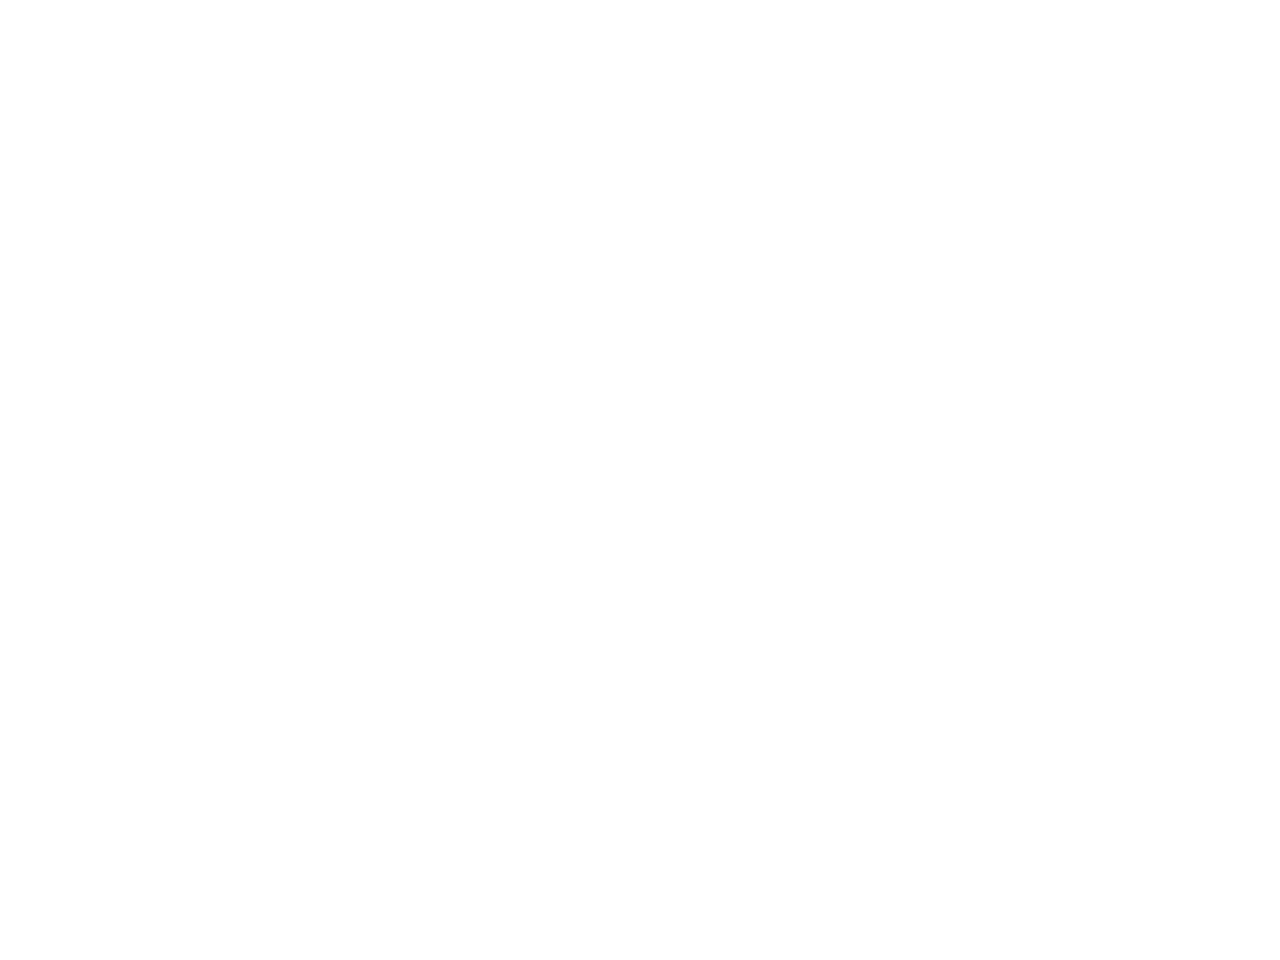

In [6]:
%matplotlib notebook
sns.set_style("darkgrid")
fig = plt.figure()
plt.title('Medieval-Modern Populations of Western Europe')
plt.ylabel("Population (millions)")
plt.xlabel("Year (A.D.)")
plots = []
#ax = plt.axes(xlim=(900, 2100), ylim=(0, 100))

In [7]:
#sns.lineplot(x=df3.iloc[:100].index,y=df3.iloc[:100]['Germany'],color="#F2CD37",marker='o',markevery=[-1],markersize=8)

In [8]:
path = "https://upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/46px-Flag_of_Germany.svg.png"

In [9]:
def animate(i):
    global plots
    for plot in plots:
        plot.remove()
    plots = []
    data = df3.iloc[:int(i+1)] # selecting the data range
    p_ger = sns.lineplot(x=data.index,y=data['Germany'],color="#003f5c",marker='o',markevery=[-1],markersize=8)
    p_fra = sns.lineplot(x=data.index,y=data['France'],color="#374c80",marker='o',markevery=[-1],markersize=8)
    p_eng = sns.lineplot(x=data.index,y=data['GBR'],color='#7a5195',marker='o',markevery=[-1],markersize=8)
    p_ibe = sns.lineplot(x=data.index,y=data['Spain and Portugal'],color='#bc5090',marker='o',markevery=[-1],markersize=8)
    p_ita = sns.lineplot(x=data.index,y=data['Italy'],color='#ef5675',marker='o',markevery=[-1],markersize=8)
    p_bel = sns.lineplot(x=data.index,y=data['Belgium'],color='#ff764a',marker='o',markevery=[-1],markersize=8)
    p_ned = sns.lineplot(x=data.index,y=data['Netherlands'],color='#ffa600',marker='o',markevery=[-1],markersize=8)
    
    plt.legend(['Germany', 'France', 'United Kingdom', 'Spain and Portugal', 'Italy', 'Belgium', 'Netherlands'],fontsize='small',loc='upper left')
    plt.title('Medieval-Modern Populations of Western Europe')
    plt.ylabel("Population (millions)")
    plt.xlabel("Year (A.D.)")
    
    plots.append(p_ger)
    #plots.append(p_fra)
    #plots.append(p_eng)
    #plots.append(p_ibe)
    #plots.append(p_ita)
    #plots.append(p_bel)
    #plots.append(p_ned)

In [10]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=100000)

In [11]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=261, repeat=True, interval=100)

In [12]:
ani.save('ani.mp4',dpi=800)

In [13]:
plt.show()

In [14]:
plt.clf()